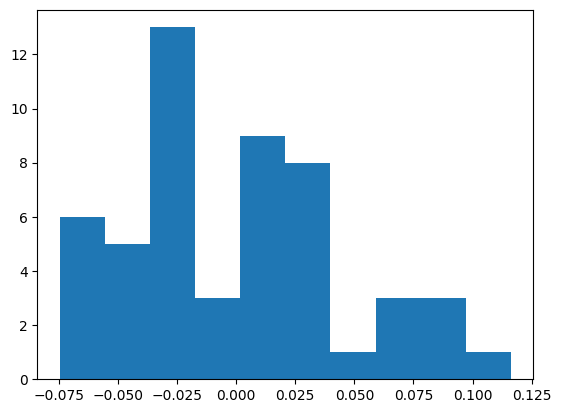

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('MSFT.csv')
df = df[['Date', 'Close']]
df['diff'] = pd.Series(np.diff(df['Close']))   #"close" column er (n+1)th value - nth value = nth value -> eivabe diff korse, kore series akare store korse
df['return'] = df['diff']/df['Close']         #again, diff value ke taar close value diye divide kore return e joma rakhse

df = df[['Date', 'return']].dropna()   #null value gula drop kore date ar return column show korse
from matplotlib import pyplot as plt

plt.hist(df['return'])
plt.show()


ei histogram bujhay je -0.075 to -0.050 te koto gulo return point or value ase (like 6 ta ase). ekhn eita ki normality kina oita test korte nicher test gulo korbo :

In [2]:
import pylab

### Q-Q plot in Python
We will start with one of the more visual and less mathematical approaches, quantile-quantile plot. It is a plot that shows the distribution of a given data against normal distribution, namely existing quantiles vs normal theoretical quantiles.

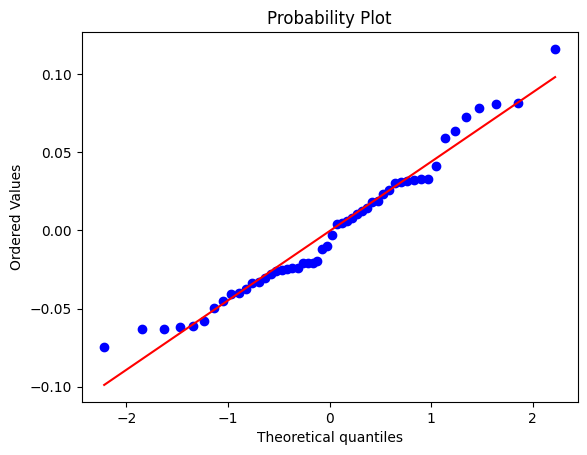

In [3]:
import scipy.stats as stats

stats.probplot(df['return'], dist="norm", plot=pylab)
pylab.show()


Looking at the graph above, we see an upward sloping linear relationship. For a normal distribution, the observations should all occur on the 45 degree straight line. Do we see such relationship above? We do partially. So what this can signal to us is that the distribution we are working with is not perfectly normal but close to it.

### Jarque–Bera test in Python
Jarque-Bera is one of the normality tests or specifically a goodness of fit test of matching skewness and kurtosis to that of a normal distribution.

Its statistic is non-negative and large values signal significant deviation from normal distribution.  
The test statistic JB of Jarque-Bera is defined by:

JB=(n/6)×[S^2+{(K−3)^2}/4]  
where S is the sample skewness, K is the sample kurtosis, and n is the sample size.  
H0:sample S and sample K is not significantly different from normal distribution
H1:sample S and sample K is significantly different from normal distribution

In [4]:
from scipy.stats import jarque_bera

result = (jarque_bera(df['return']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")


JB statistic: 2.4360434983632477
p-value: 0.2958147843125975


Looking at these results, we fail to reject the null hypothesis and conclude that the sample data follows normal distribution.  

Note: Jarque-Bera test works properly in large samples (usually larger than 2000 observations) at its statistic has a Chi-squared distribution with 2 degrees of freedom).

### Kolmogorov-Smirnov test in Python
One of the most frequently tests for normality is the Kolmogorov-Smirnov test (or K-S test). A major advantage compared to other tests is that Kolmogorov-Smirnov test is nonparametric, meaning that it is distribution-free.

Here we focus on the one-sample Kolmogorov-Smirnov test because we are looking to compare a one-dimensional probability distribution with a theoretically specified distribution (in our case it is normal distribution).  
The Kolmogorov-Smirnov test statistic measures the distance between the empirical distribution function (ECDF) of the sample and the cumulative distribution function of the reference distribution.

In our example, the empirical distribution function will come from the data on returns we have compiled earlier. And since we are comparing it to normal distribution, we will work with cumulative distribution function of the normal distribution.

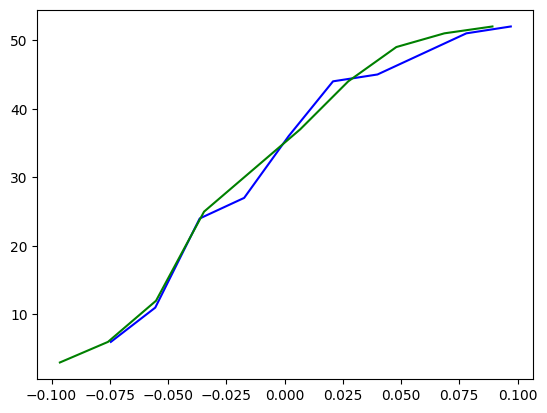

In [23]:
import numpy as np
data_norm = np.random.normal(np.mean(df['return']), np.std(df['return']), len(df))
values, base = np.histogram(df['return'])       # df['return'] -> jei data gulo ase shegulo ke range a vag kore certain range e koyta kore data ase oi frequency ber kore, eikhne range ta 'base' ar freq ta 'values'. 
values_norm, base_norm = np.histogram(data_norm)     #ei function always 2 dimension data output e de
cumulative = np.cumsum(values)         #comulative sum ber kore
cumulative_norm = np.cumsum(values_norm)
plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_norm[:-1], cumulative_norm, c='green')
plt.show()

 

Alternate way to plot :

<AxesSubplot: xlabel='return', ylabel='Proportion'>

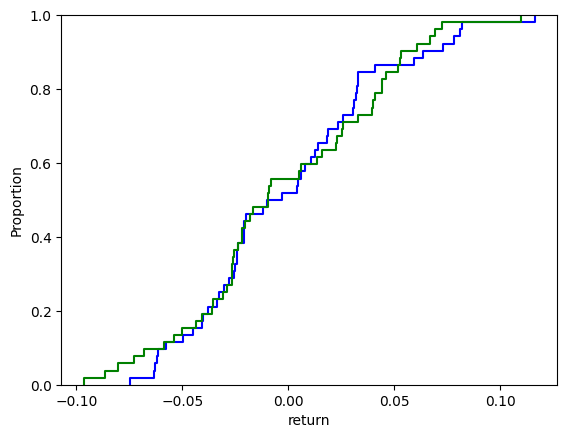

In [25]:
import seaborn as sns

sns.ecdfplot(df['return'], c='blue')     #ECDF (empirical cumulative distribution function)
sns.ecdfplot(data_norm, c='green')


after visualizing these two cumulative distribution functions. Kolmogorov-Smirnov test is based on the maximum distance between these two curves (blue – green) with the following hypotheses:

H0: two samples are from the same distribution

H1: two samples are from different distributions

In [26]:
from scipy.stats import kstest

result = (kstest(df['return'], cdf='norm'))

print(f"K-S statistic: {result[0]}")
print(f"p-value: {result[1]}")


K-S statistic: 0.4702796188245065
p-value: 4.523904299860333e-11


Since the p-value is significantly less than 0.05, we reject the null hypothesis and accept the alternative hypothesis that two samples tested are not from the same cumulative distribution, meaning that the returns on Microsoft stock are not normally distributed.
